In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()
import warnings 
warnings.filterwarnings("ignore")

# 1 - Business Problem

Prepare a model for glass classification using KNN

# 2 - Data collection and description

In [44]:
df = pd.read_csv("D:Harsha/Data sciences/Assignments/Assignment_13_KNN/glass.csv")

In [45]:
df1 = df.copy()

In [46]:
df1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [47]:
df1.tail(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
204,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [48]:
df1.shape

(214, 10)

In [49]:
df1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [50]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [52]:
df1.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


# 3 - Data visualization

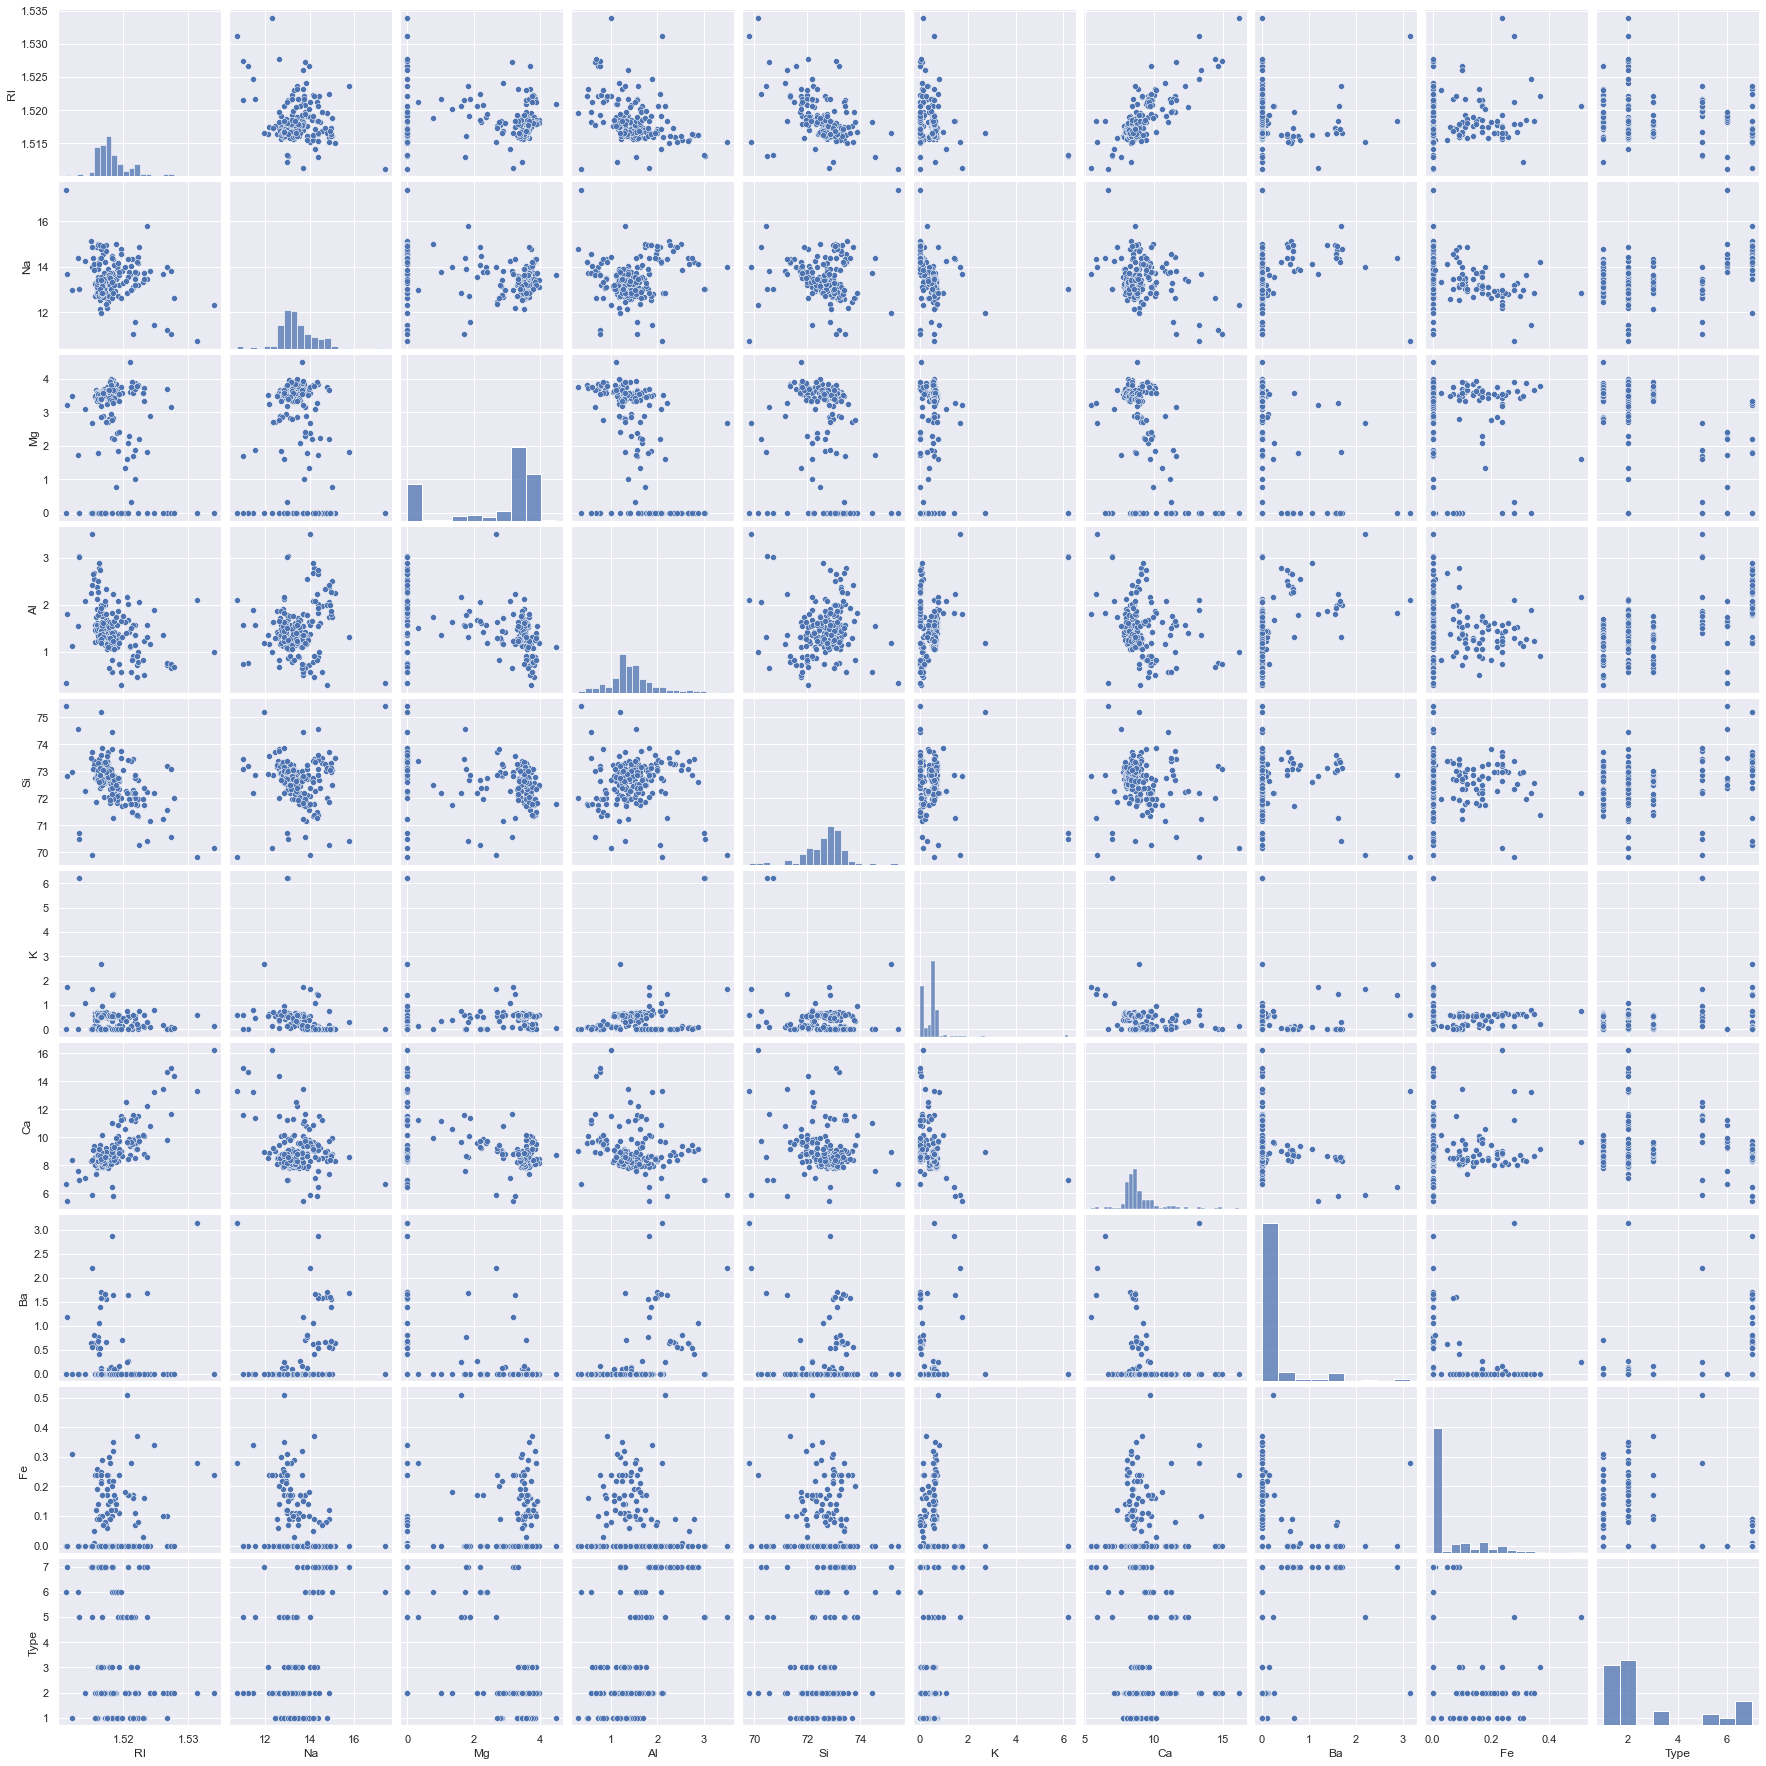

In [53]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

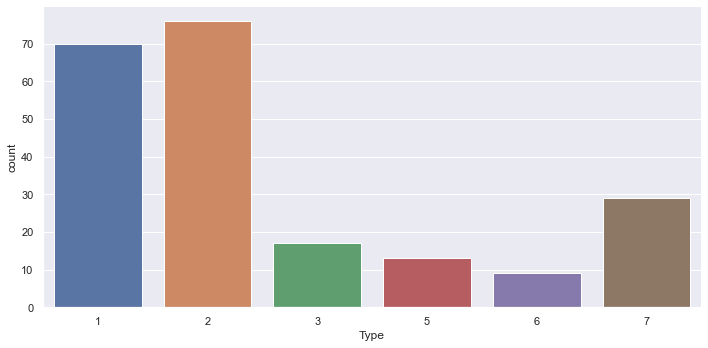

In [54]:
sns.factorplot('Type', data=df1, kind="count",size = 5,aspect = 2)

### As shown in the above graph, majority types of glasses are building_windows_float_processed and building_windows_non_float_processed, useded by headlamps.

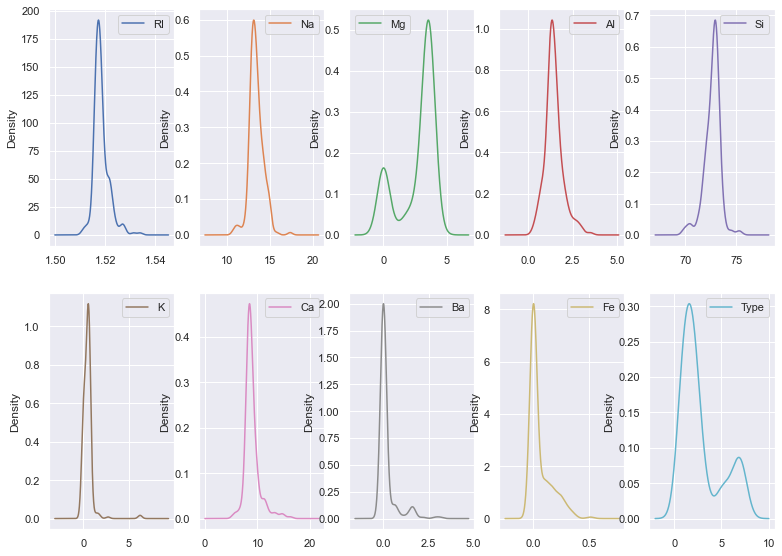

In [55]:
df1.plot(kind='density', subplots=True, layout=(4,5), 
         figsize=(13,20), sharex=False, sharey=False)
plt.show()

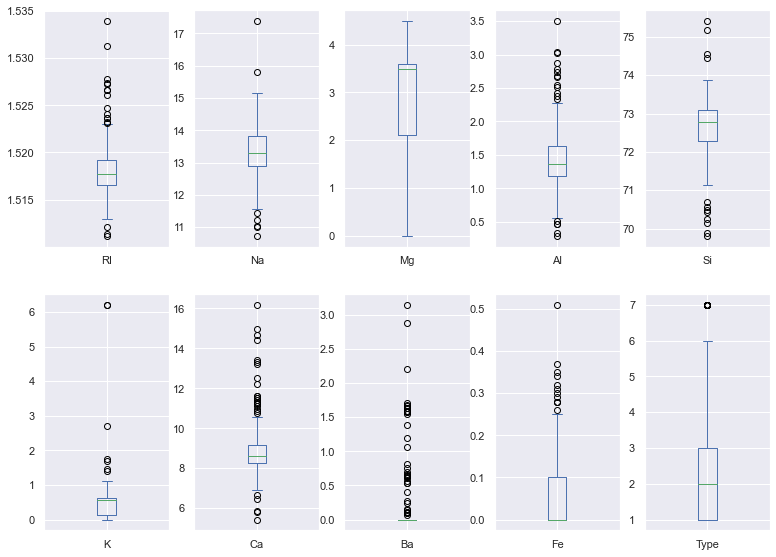

In [56]:
df1.plot(kind='box', subplots=True, layout=(4,5), 
         figsize=(13,20), sharex=False, sharey=False)
plt.show()

# 4 - Finding correlation between the variables in the data

In [57]:
cor = df1.corr(method='pearson')

<AxesSubplot:>

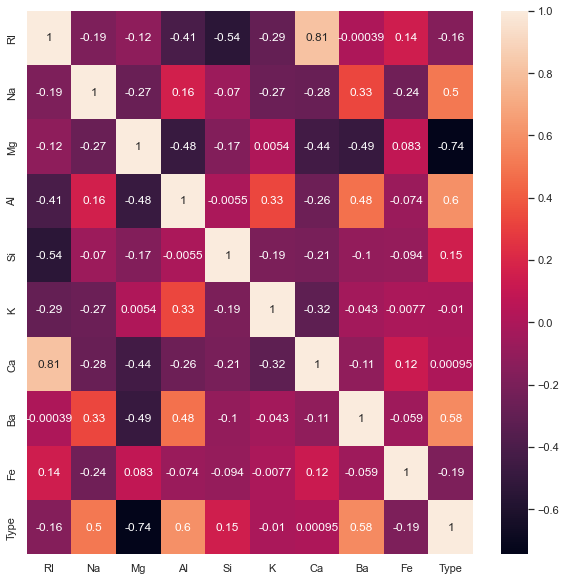

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(cor , annot = True)

In [59]:
cor.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the height correlated variables.

# 5 - KNN

### 5.1 Finding optimal number of K

In [60]:
X = np.array(df1.iloc[:,3:5])
y = np.array(df1['Type'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [62]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [63]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

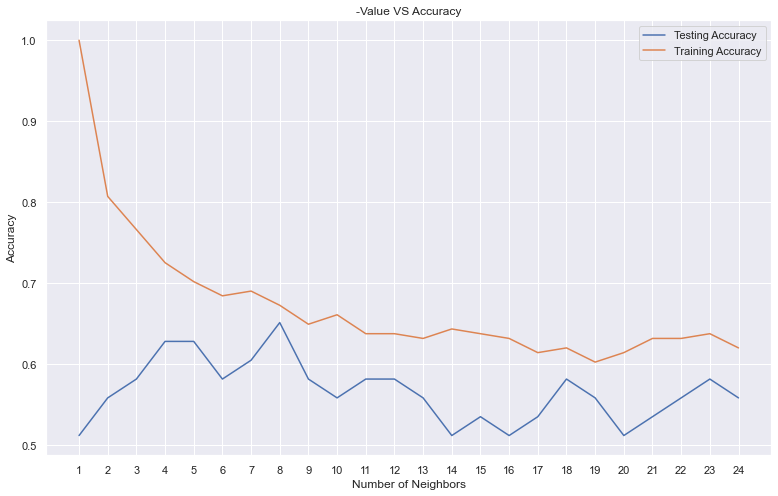

In [64]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

### we can see that k=4 produces the most accurate results.

### 5.2 Applying the algorithm

In [69]:
knn = KNeighborsClassifier(n_neighbors=4)

In [70]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [71]:
scores = []
cv_scores = []

In [72]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [73]:
score_knn=cross_val_score(knn, X,y, cv=10)

In [74]:
score_knn.mean()

0.6127705627705629

In [75]:
score_knn.std()*2

0.23547117559816877

In [76]:
cv_score = score_knn.mean()

In [77]:
cv_scores.append(cv_score)

In [78]:
cv_scores

[0.6127705627705629]

# 6 - Conclusion

## Support Vector Machine Accuracy: 0.61 (+/- 0.23)